In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
sentiment_df = pd.read_csv('sentiment_statistics.csv')

In [3]:
sentiment_df

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35
...,...,...,...,...,...,...
71805,1563273072,413148,calm,calm,0.05,0.34
71806,8865997781,980156,calm,frustrated,0.03,0.22
71807,8019240181,616988,calm,polite,0.05,0.42
71808,8332067080,161354,neutral,polite,-0.07,0.13


In [4]:
# Initial Data Inspection
print(sentiment_df.info())  # Check column types and null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_id                  71810 non-null  int64  
 1   agent_id                 71810 non-null  int64  
 2   agent_tone               71593 non-null  object 
 3   customer_tone            71810 non-null  object 
 4   average_sentiment        71701 non-null  float64
 5   silence_percent_average  71810 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 3.3+ MB
None


In [5]:
print(sentiment_df.describe())  # Summary statistics for numeric columns

            call_id       agent_id  average_sentiment  silence_percent_average
count  7.181000e+04   71810.000000       71701.000000             71810.000000
mean   4.993574e+09  564768.278039          -0.033519                 0.285515
std    2.889673e+09  257532.362167           0.143715                 0.192031
min    1.316420e+05  102574.000000          -1.380000                 0.000000
25%    2.480013e+09  347606.000000          -0.110000                 0.130000
50%    4.989448e+09  591778.000000          -0.020000                 0.260000
75%    7.493629e+09  786323.000000           0.050000                 0.410000
max    9.999806e+09  993862.000000           2.670000                 0.980000


In [6]:
print(sentiment_df.isnull().sum())  # Check for null values

call_id                      0
agent_id                     0
agent_tone                 217
customer_tone                0
average_sentiment          109
silence_percent_average      0
dtype: int64


In [7]:
# Drop columns with a high number of nulls (if any)
sentiment_df_cleaned = sentiment_df.dropna(axis=1, thresh=int(0.6 * len(sentiment_df)))  # Keeping columns with 60% non-null values


In [8]:
# Drop rows with any null values (if needed)
sentiment_df_cleaned = sentiment_df_cleaned.dropna()


In [9]:
 # Check cleaned dataset
print(sentiment_df_cleaned.isnull().sum())

call_id                    0
agent_id                   0
agent_tone                 0
customer_tone              0
average_sentiment          0
silence_percent_average    0
dtype: int64


/var/folders/nq/999184vs10z8d59n1_268m_c0000gn/T/ipykernel_20141/3231120356.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='agent_tone', data=sentiment_df_cleaned, palette='coolwarm')


Text(0.5, 0, 'Agent Tone')

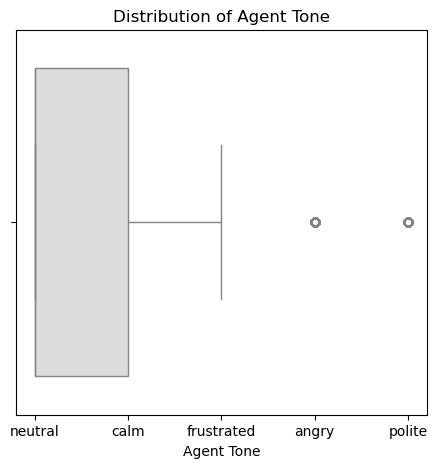

In [10]:
# Set up the figure for subplots
plt.figure(figsize=(18, 5))

# Plot Agent Tone
plt.subplot(1, 3, 1)
sns.boxplot(x='agent_tone', data=sentiment_df_cleaned, palette='coolwarm')
plt.title('Distribution of Agent Tone')
plt.xlabel('Agent Tone')


/var/folders/nq/999184vs10z8d59n1_268m_c0000gn/T/ipykernel_20141/2110954309.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='customer_tone', data=sentiment_df_cleaned, palette='coolwarm')


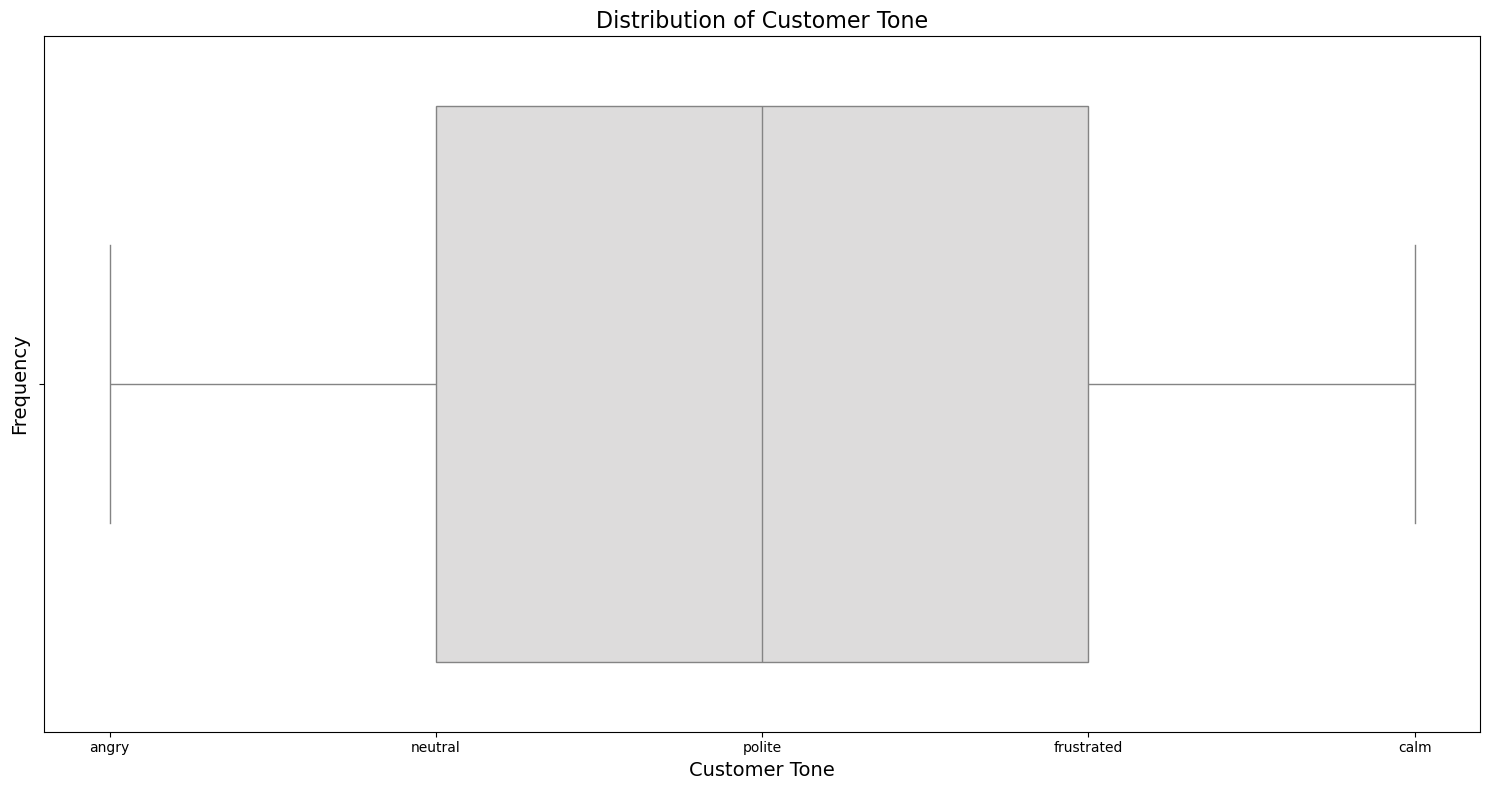

In [22]:
# Set up a larger figure
plt.figure(figsize=(15, 8))  # Increase the size of the figure

# Plot Customer Tone
sns.boxplot(x='customer_tone', data=sentiment_df_cleaned, palette='coolwarm')
plt.title('Distribution of Customer Tone', fontsize=16)
plt.xlabel('Customer Tone', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.tight_layout()  # Ensure everything fits without overlap
plt.show()


/var/folders/nq/999184vs10z8d59n1_268m_c0000gn/T/ipykernel_20141/3769803529.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='average_sentiment', data=sentiment_df_cleaned, palette='coolwarm')


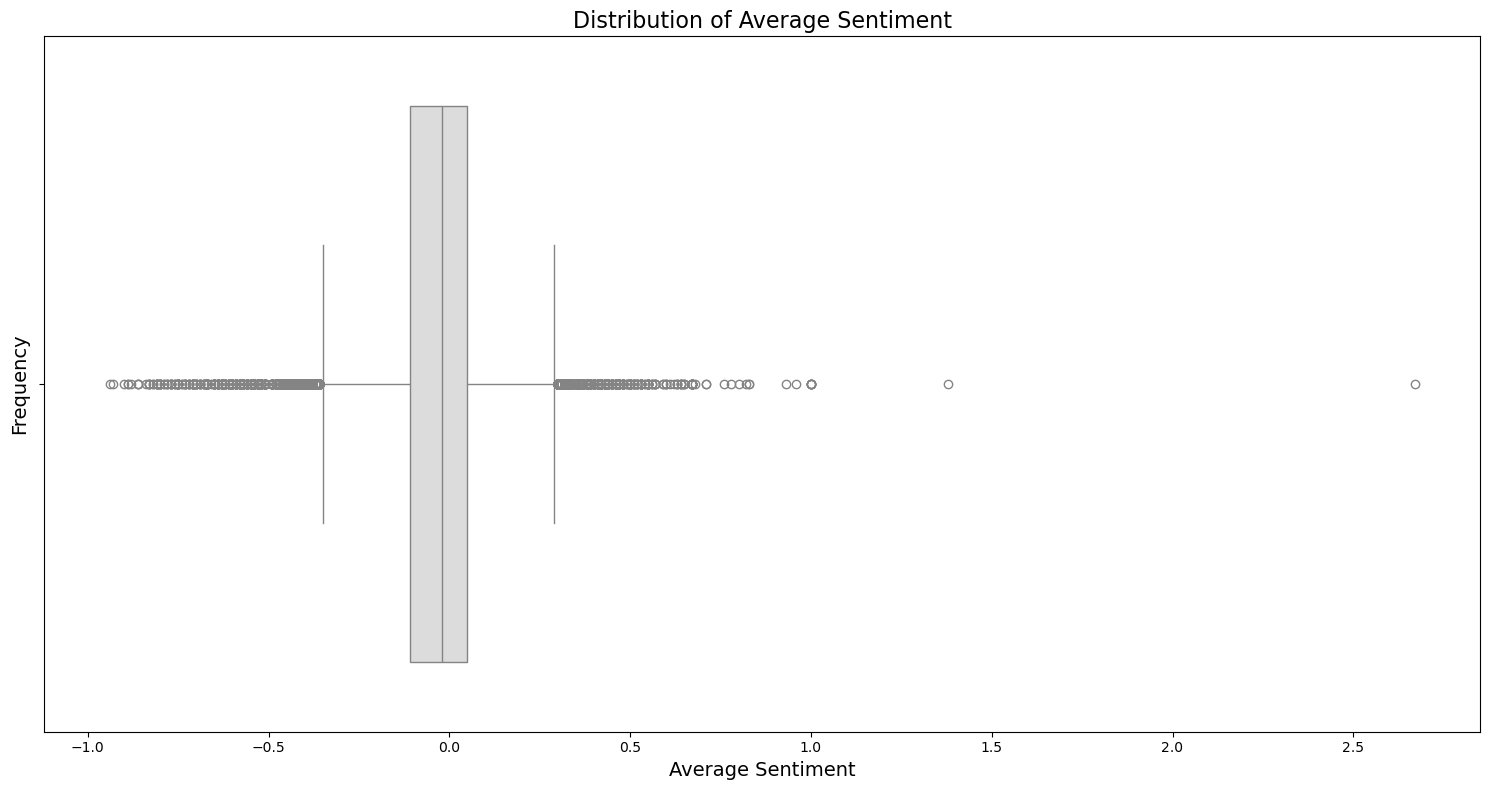

In [23]:
# Set up a larger figure for the boxplot
plt.figure(figsize=(15, 8))  # Increase the size of the figure

# Plot Average Sentiment
sns.boxplot(x='average_sentiment', data=sentiment_df_cleaned, palette='coolwarm')
plt.title('Distribution of Average Sentiment', fontsize=16)
plt.xlabel('Average Sentiment', fontsize=14)
plt.ylabel('Frequency', fontsize=14)  # You can also add a y-axis label for clarity

# Ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()


Text(0, 0.5, 'Frequency')

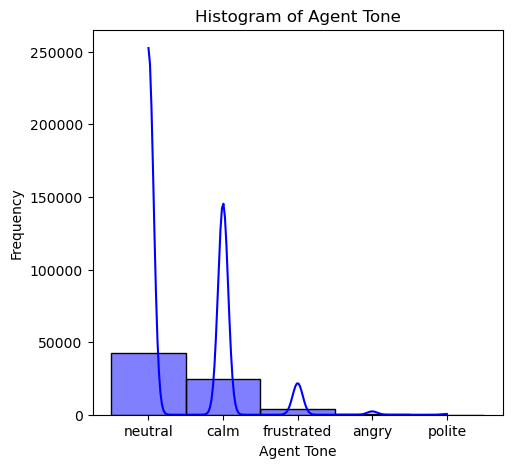

In [24]:
# Set up the figure for histograms
plt.figure(figsize=(18, 5))

# Histogram for Agent Tone
plt.subplot(1, 3, 1)
sns.histplot(sentiment_df_cleaned['agent_tone'], bins=30, kde=True, color='blue')
plt.title('Histogram of Agent Tone')
plt.xlabel('Agent Tone')
plt.ylabel('Frequency')

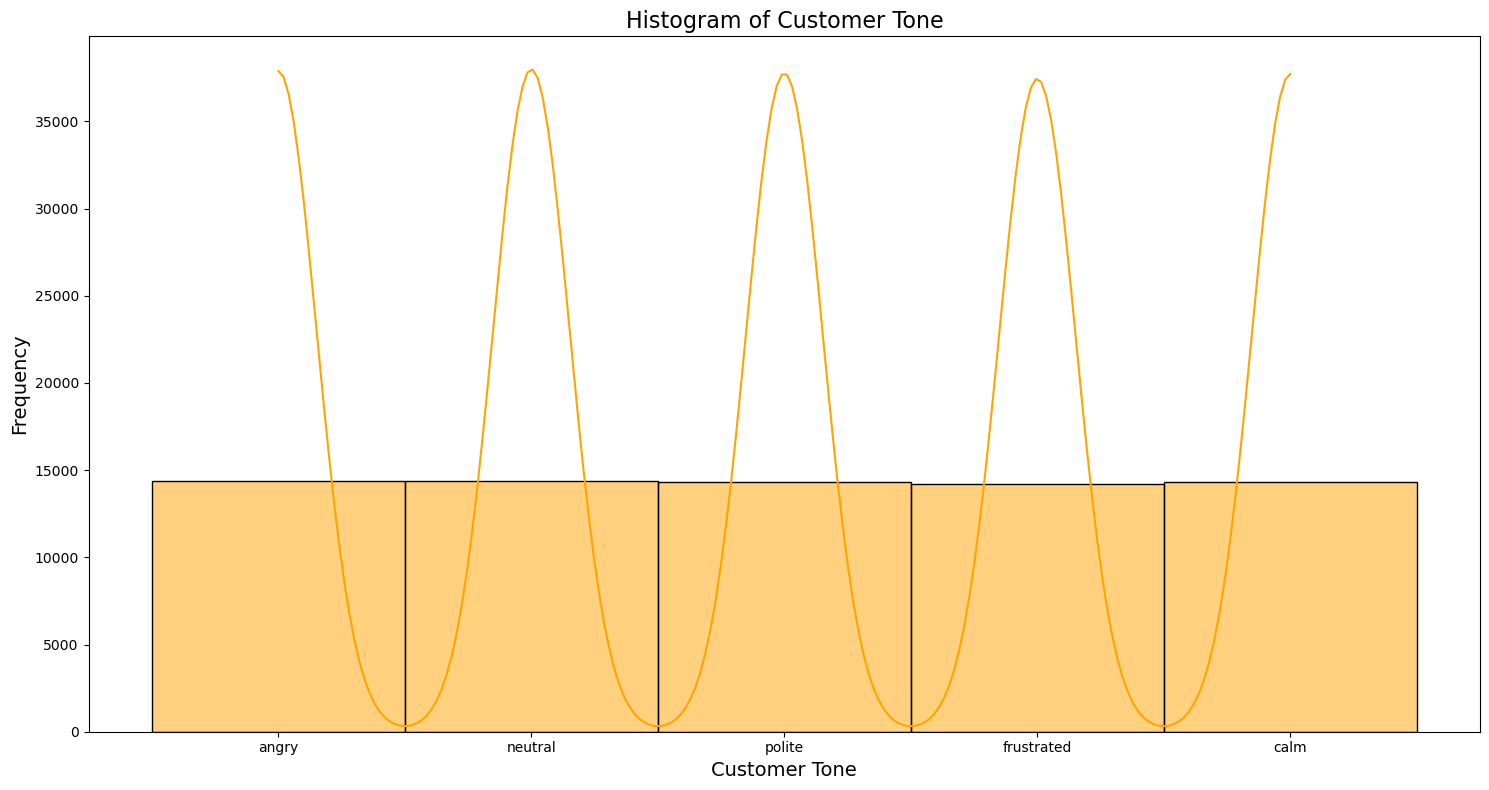

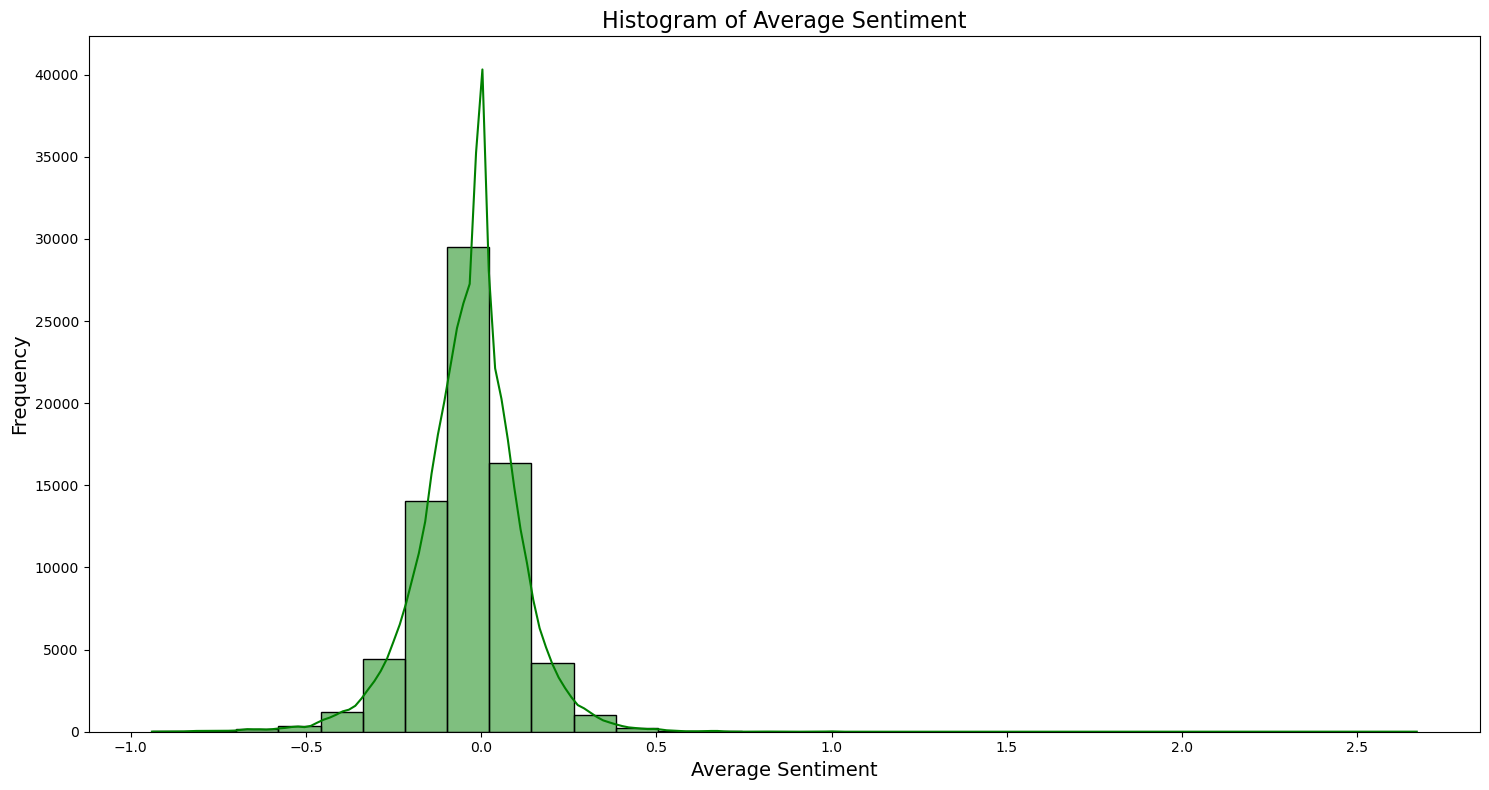

In [26]:
# Set up a larger figure for the histogram
plt.figure(figsize=(15, 8))  # Increase the size of the figure

# Plot Histogram for Average Sentiment
sns.histplot(sentiment_df_cleaned['average_sentiment'], bins=30, kde=True, color='green')
plt.title('Histogram of Average Sentiment', fontsize=16)
plt.xlabel('Average Sentiment', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Ensure the layout fits well
plt.tight_layout()

# Show the plot
plt.show()
